<a href="https://colab.research.google.com/github/Hyperionlll/Israel-teste/blob/main/atividade6CompVisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Identificação do grupo:
# - Diego Guedes de Moraes, 10389879
# - Fabio Domingues Pereira Sabino, 10277530
# - Mayara Meneghetti Honda, 10390051
# - Pedro Moreno Campos, 10390807

In [ ]:
# importando biblioteca
import scipy
scipy.__version__

'1.11.4'

In [ ]:
# importando biblioteca
import skimage
skimage.__version__

'0.19.3'

In [ ]:
# fazer a leitura de um arquivo de imagem
from skimage import io
from skimage.color import rgb2gray

img_filename = 'kodim23.png'
img_original = io.imread(img_filename)
img_gray = rgb2gray(img_original)

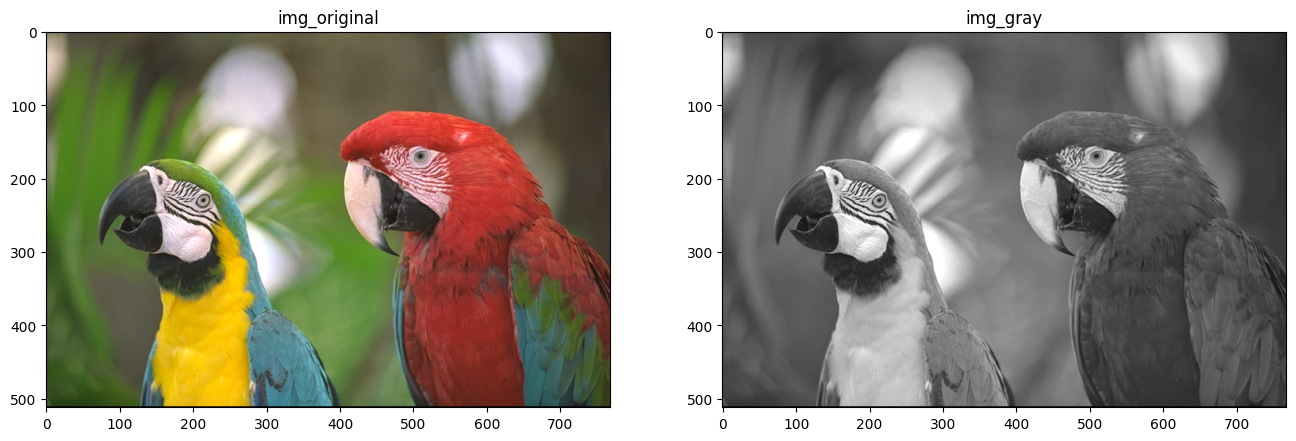

In [ ]:
# imagem original e sua versão em escala de cinza usando o Matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_original')
axs[0].imshow(img_original, cmap=plt.cm.gray)
axs[1].set_title('img_gray')
axs[1].imshow(img_gray, cmap=plt.cm.gray)
plt.show()

In [ ]:
# código Python para definir o kernel, array e função callback (filtro de suavização de tamanho 5x5)
size = 5
kernel = np.ones((size, size), np.uint8)
pesos = np.full((1, size * size), 1 / (size * size))

def callback_function(buffer, weights):
    return (buffer * weights).sum()

In [ ]:
# printa kernel e pesos
print(f'kernel: {kernel}')
print(f'pesos: {pesos}')

kernel: [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
pesos: [[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]


In [ ]:
# imagem a ser filtrada (em tons de cinza) no parâmetro input, nossa função callback no parâmetro function, o kernel no parâmetro footprint e os pesos como extra_arguments. A imagem filtrada é salva na variável img_filtered
from scipy.ndimage import generic_filter
img_filtered = generic_filter(input=img_gray, function=callback_function, footprint=kernel, extra_arguments=(pesos,))

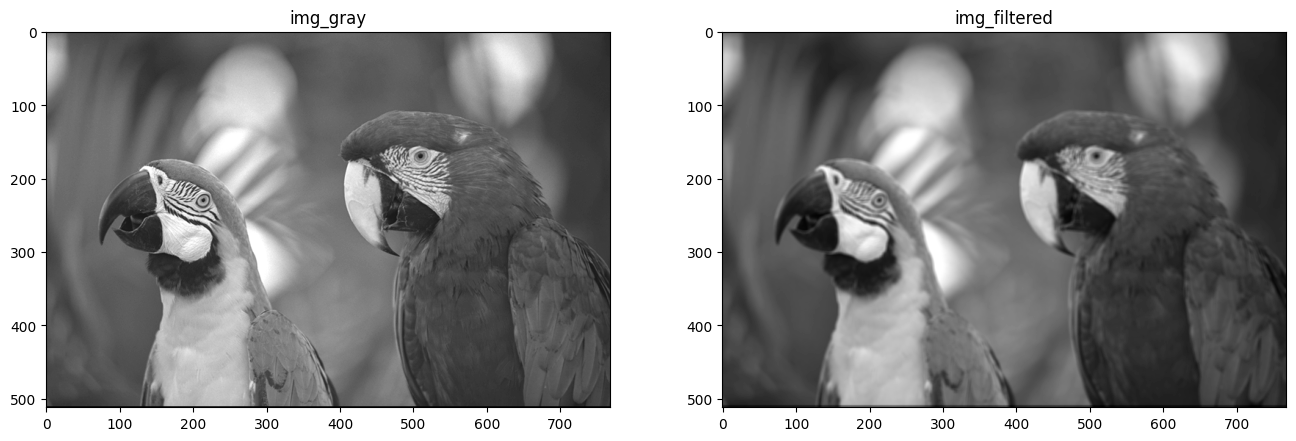

In [ ]:
# exibição da imagem original em tons de cinza e imagem filtrada
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_filtered')
axs[1].imshow(img_filtered, cmap=plt.cm.gray)
plt.show()

In [ ]:
# exemplo de código Python que filtra uma imagem em tons de cinza e exibe o resultado do filtro gaussiano (com sigma=3) ao lado da imagem original.
from skimage.filters import gaussian
img_gaussian = gaussian(image=img_gray, sigma=3)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_gaussian')
axs[1].imshow(img_gaussian, cmap=plt.cm.gray)
plt.show()

In [ ]:
# Identificação do grupo:
# - Diego Guedes de Moraes, 10389879
# - Fabio Domingues Pereira Sabino, 10277530
# - Mayara Meneghetti Honda, 10390051
# - Pedro Moreno Campos, 10390807

In [16]:
import numpy as np

def blur3x3(img_color):
    height, width, channels = img_color.shape
    result = np.zeros_like(img_color, dtype=np.float32)

    # Define o kernel de convolução
    kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9

    # Loop pelos canais de cor
    for c in range(channels):
        # Loop pelas coordenadas da imagem
        for y in range(height):
            for x in range(width):
                # Calcula a média ponderada dos valores dos pixels ao redor
                # considerando o kernel
                total = 0.0
                for ky in range(-1, 2):
                    for kx in range(-1, 2):
                        pixel_y = y + ky
                        pixel_x = x + kx
                        # Verifica se as coordenadas do pixel estão dentro da imagem
                        if pixel_y >= 0 and pixel_y < height and pixel_x >= 0 and pixel_x < width:
                            total += img_color[pixel_y, pixel_x, c] * kernel[ky + 1, kx + 1]
                # Atribui o valor calculado ao pixel na imagem resultante
                result[y, x, c] = total

    return result.astype(np.uint8)

In [19]:
# EXERCICIO 1
def blur3x3(img_color):
    height, width, channels = img_color.shape
    result = np.zeros_like(img_color, dtype=np.float32)

    # Define o kernel de convolução
    kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9

    # Loop pelos canais de cor
    for c in range(channels):
        # Loop pelas coordenadas da imagem
        for y in range(height):
            for x in range(width):
                # Calcula a média ponderada dos valores dos pixels ao redor
                # considerando o kernel
                total = 0.0
                for ky in range(-1, 2):
                    for kx in range(-1, 2):
                        pixel_y = y + ky
                        pixel_x = x + kx
                        # Verifica se as coordenadas do pixel estão dentro da imagem
                        if pixel_y >= 0 and pixel_y < height and pixel_x >= 0 and pixel_x < width:
                            total += img_color[pixel_y, pixel_x, c] * kernel[ky + 1, kx + 1]
                # Atribui o valor calculado ao pixel na imagem resultante
                result[y, x, c] = total

    return result.astype(np.uint8)

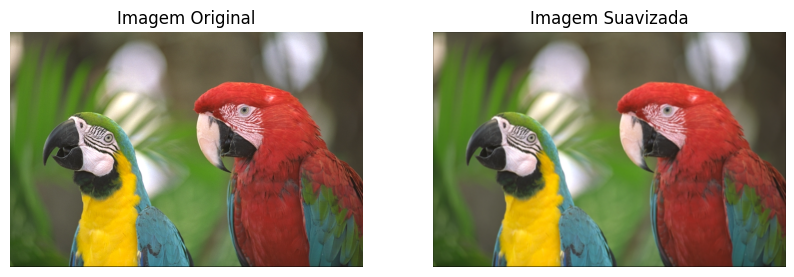

In [21]:
# Aplica o filtro blur
img_blurred = blur3x3(img_original)

# Exibição da imagem original e da imagem suavizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(img_original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Suavizada')
plt.imshow(img_blurred)
plt.axis('off')

plt.show()

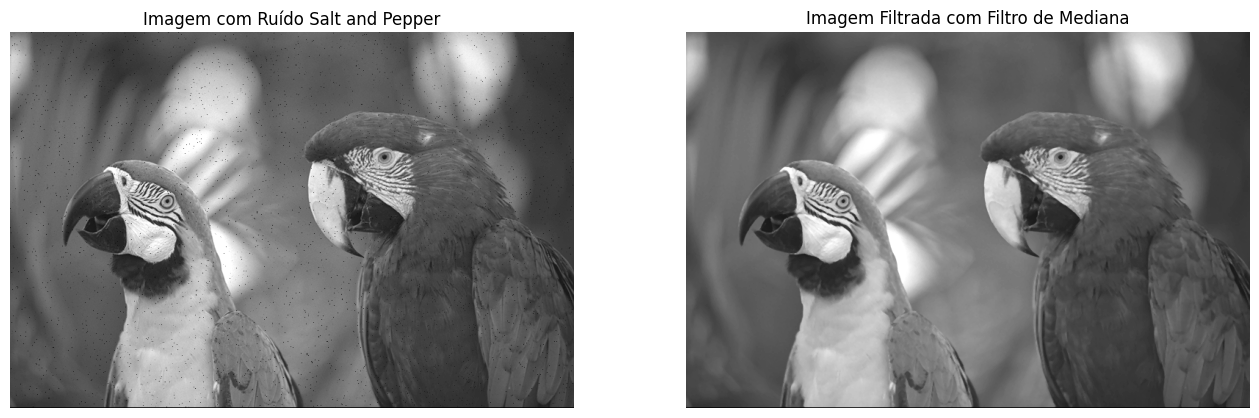

In [23]:
# EXERCICIO 2
from skimage.filters import median
from skimage import img_as_ubyte

# Carregando a imagem com ruído salt and pepper
img_salt_pepper = io.imread('kodim23-salt_and_pepper.png')

# Aplicando o filtro de mediana para remover o ruído
img_filtered_median = median(img_salt_pepper)

# Exibindo a imagem original com ruído e a imagem filtrada
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('Imagem com Ruído Salt and Pepper')
axs[0].imshow(img_salt_pepper, cmap=plt.cm.gray)
axs[0].axis('off')

axs[1].set_title('Imagem Filtrada com Filtro de Mediana')
axs[1].imshow(img_filtered_median, cmap=plt.cm.gray)
axs[1].axis('off')

plt.show()

In [ ]:
# EXERCÍCIO 3
#  O filtro de mediana calcula a mediana dos valores de intensidade em uma vizinhança do pixel, tornando-o robusto contra ruído Salt and Pepper, pois não é afetado por valores extremos e preserva bordas.

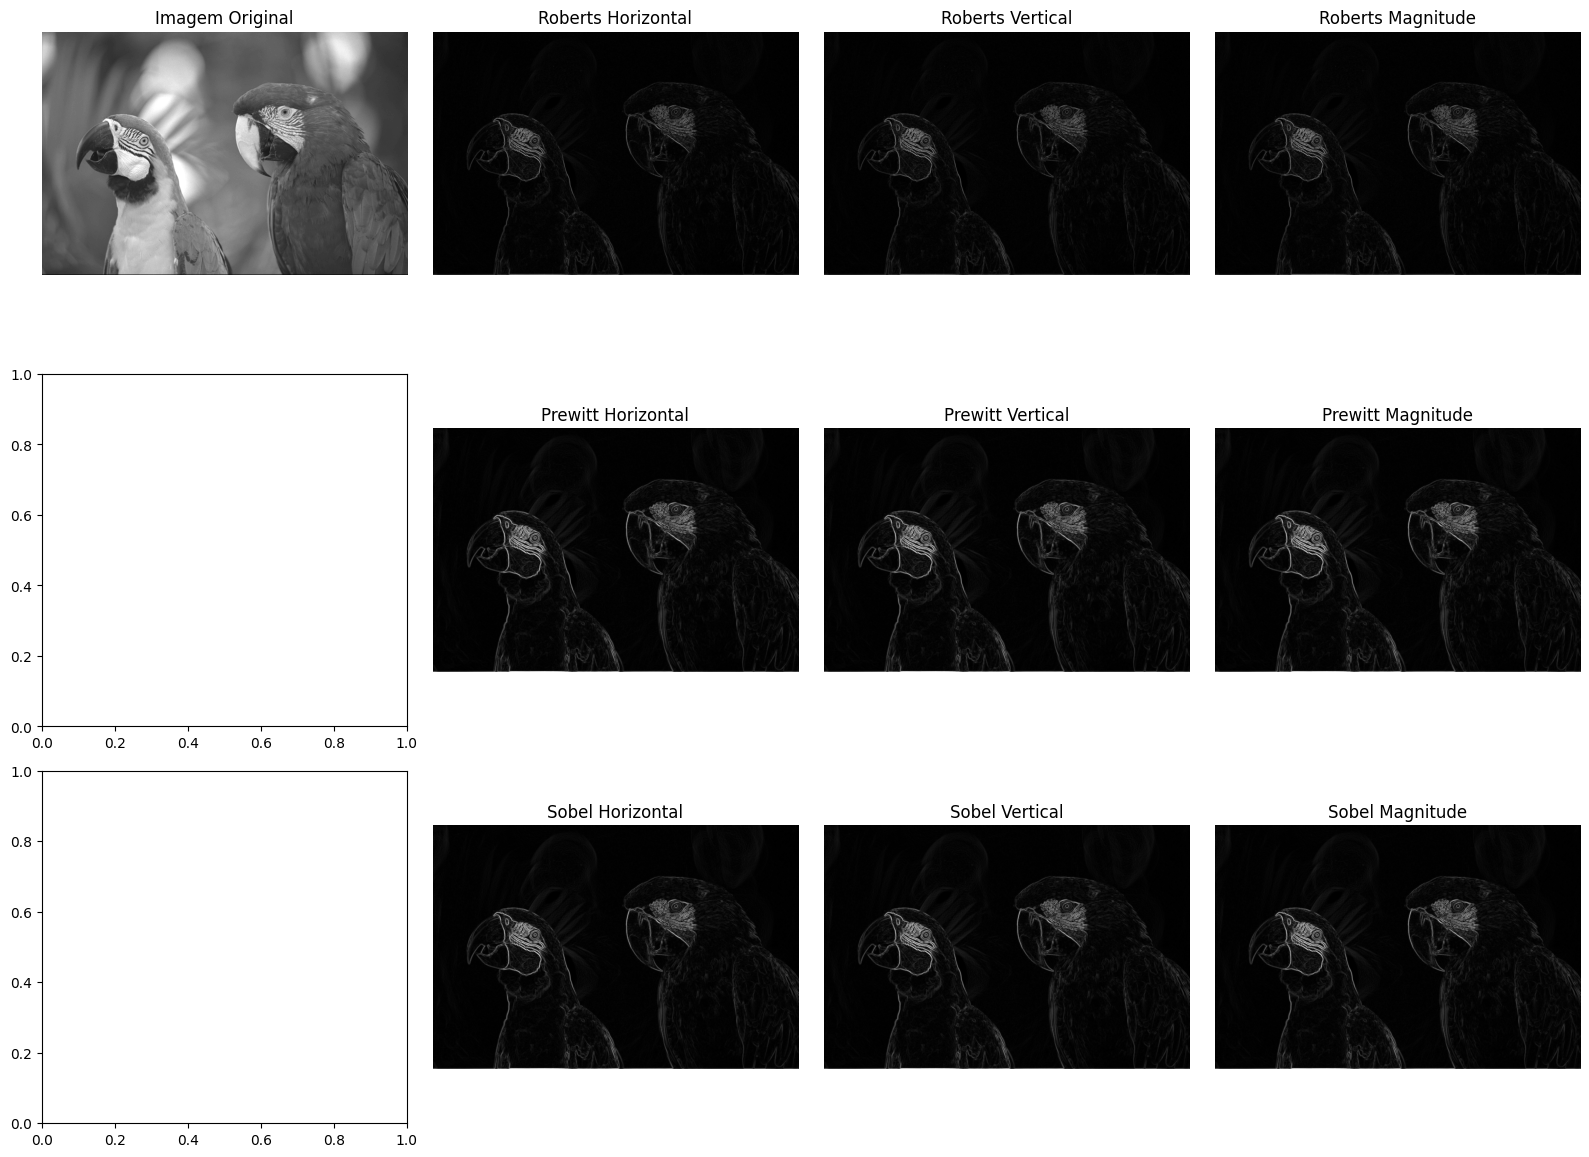

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# Carregando a imagem de entrada
img = io.imread('kodim23.png', as_gray=True)

# Operador de gradiente Roberts
roberts_horizontal = filters.roberts(img)
roberts_vertical = filters.roberts(img)

# Operador de gradiente Prewitt
prewitt_horizontal = filters.prewitt(img)
prewitt_vertical = filters.prewitt(img)

# Operador de gradiente Sobel
sobel_horizontal = filters.sobel(img)
sobel_vertical = filters.sobel(img)

# Calculando a magnitude dos gradientes
roberts_magnitude = np.sqrt(roberts_horizontal**2 + roberts_vertical**2)
prewitt_magnitude = np.sqrt(prewitt_horizontal**2 + prewitt_vertical**2)
sobel_magnitude = np.sqrt(sobel_horizontal**2 + sobel_vertical**2)

# Exibindo as imagens
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Imagem original
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

# Roberts
axs[0, 1].imshow(roberts_horizontal, cmap='gray')
axs[0, 1].set_title('Roberts Horizontal')
axs[0, 1].axis('off')

axs[0, 2].imshow(roberts_vertical, cmap='gray')
axs[0, 2].set_title('Roberts Vertical')
axs[0, 2].axis('off')

axs[0, 3].imshow(roberts_magnitude, cmap='gray')
axs[0, 3].set_title('Roberts Magnitude')
axs[0, 3].axis('off')

# Prewitt
axs[1, 1].imshow(prewitt_horizontal, cmap='gray')
axs[1, 1].set_title('Prewitt Horizontal')
axs[1, 1].axis('off')

axs[1, 2].imshow(prewitt_vertical, cmap='gray')
axs[1, 2].set_title('Prewitt Vertical')
axs[1, 2].axis('off')

axs[1, 3].imshow(prewitt_magnitude, cmap='gray')
axs[1, 3].set_title('Prewitt Magnitude')
axs[1, 3].axis('off')

# Sobel
axs[2, 1].imshow(sobel_horizontal, cmap='gray')
axs[2, 1].set_title('Sobel Horizontal')
axs[2, 1].axis('off')

axs[2, 2].imshow(sobel_vertical, cmap='gray')
axs[2, 2].set_title('Sobel Vertical')
axs[2, 2].axis('off')

axs[2, 3].imshow(sobel_magnitude, cmap='gray')
axs[2, 3].set_title('Sobel Magnitude')
axs[2, 3].axis('off')

plt.tight_layout()
plt.show()